# Week 3 Homework (Due on Monday, Feb. 17 at 11:59PM)
Build kNN model with k = 1, 15, 50 on the training set.  For each model, display the decision regions and error rate on the training data.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Load the data set
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
data = pd.read_csv(url, sep=',')
data.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


In [48]:
data.shape

(200, 3)

In [49]:
# Handle missing values
pd.isnull(data).sum()
# data = data.dropna()

x1    0
x2    0
y     0
dtype: int64

In [68]:
# Distribution of the values
num_cols = ['x1', 'x2']
data[num_cols].describe()

,x1,x2
count,200.000000,200.000000
mean,0.784672,0.756016
std,1.297582,1.026442
min,-2.520820,-1.999853
25%,-0.071465,0.095555
50%,0.859702,0.861387
75%,1.543438,1.435275
max,4.170746,2.855805


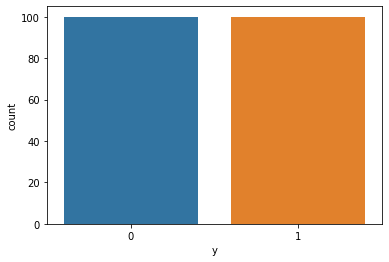

In [50]:
sns.countplot(data['y'])

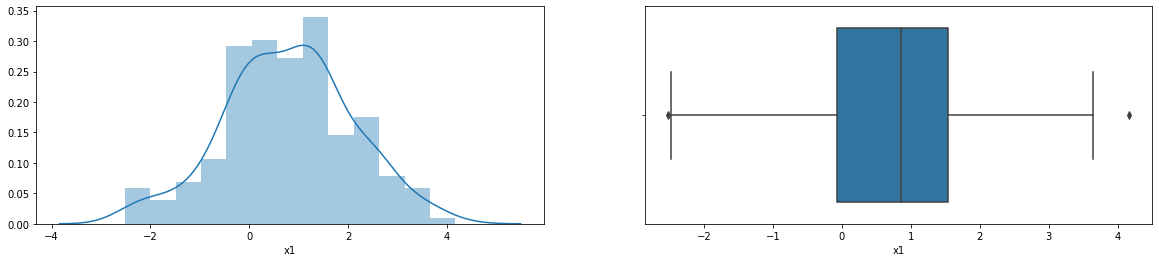

In [51]:
f = plt.figure(figsize=(20, 4))
f.add_subplot(1,2,1)
sns.distplot(data['x1'])
f.add_subplot(1,2,2)
sns.boxplot(data['x1'])

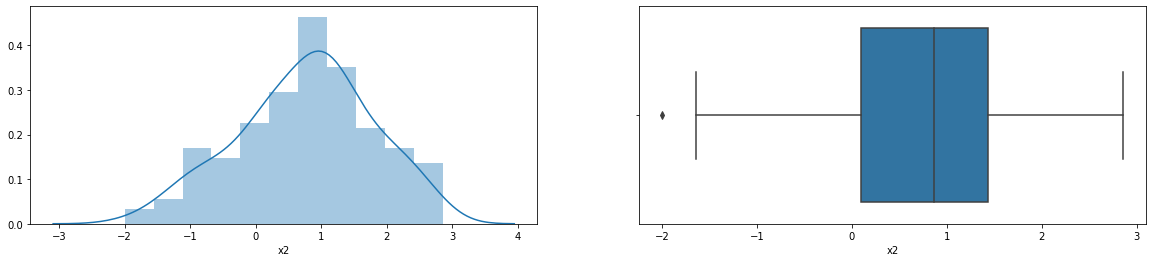

In [52]:
f = plt.figure(figsize=(20, 4))
f.add_subplot(1,2,1)
sns.distplot(data['x2'])
f.add_subplot(1,2,2)
sns.boxplot(data['x2'])

The plot above shows that the data has no outliers.

# kNN model K = 1

In [54]:
# Preprocessing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('y', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
# Scaling the features
scaled_features = scaler.transform(data.drop('y', axis=1))
data_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_feat.head()

,x1,x2
0,1.345419,-0.424824
1,-0.322728,-0.707661
2,-0.012711,-0.037632
3,-0.070489,0.020684
4,-0.621562,0.108644


In [56]:
# Train Test Split, splits the dataset into 80% train data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['y'],
                                                                         test_size=0.20)

In [57]:
# kNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
# Predictions
pred = knn.predict(X_test)
pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [59]:
# Evaluate kNN model
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n" , confusion_matrix(y_test, pred))
print("Classification Report:\n" , classification_report(y_test, pred))

Confusion Matrix:
 [[18  2]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.88      0.70      0.78        20

    accuracy                           0.80        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40



In [71]:
# SVM model
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
input_cols = ['x1', 'x2']
model_svm.fit(data[input_cols], data['y'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [72]:
test_data = pd.DataFrame({
    'x1': [-2, 3, 0],
    'x2': [2, -1, -2]
})
test_data

,x1,x2
0,-2,2
1,3,-1
2,0,-2


In [73]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

[1 0 0]


In [74]:
# Visualize the decision region
test_data_full = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        test_data_full = test_data_full.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
test_data_full

,x1,x2
0,-3.0,-2.000000
1,-3.0,-1.949495
2,-3.0,-1.898990
3,-3.0,-1.848485
4,-3.0,-1.797980
5,-3.0,-1.747475
6,-3.0,-1.696970
7,-3.0,-1.646465
8,-3.0,-1.595960
9,-3.0,-1.545455


In [75]:
test_data_full.shape

(10000, 2)

In [76]:
test_data_full['prediction'] = model_svm.predict(test_data_full[['x1', 'x2']])
test_data_full.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


### Decision Region

In [89]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(data[['x1', 'x2']], data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [79]:
# We defined test_data before
test_data

,x1,x2
0,-2,2
1,3,-1
2,0,-2


In [96]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

[1 0 0]


In [97]:
test_data_full

,x1,x2,prediction,prediction2
0,-3.0,-2.000000,0,0
1,-3.0,-1.949495,0,0
2,-3.0,-1.898990,0,0
3,-3.0,-1.848485,0,0
4,-3.0,-1.797980,0,0
5,-3.0,-1.747475,0,0
6,-3.0,-1.696970,0,0
7,-3.0,-1.646465,0,0
8,-3.0,-1.595960,0,0
9,-3.0,-1.545455,0,0


In [98]:
# Find model prediction on each point in test_data_full
two_points = np.array([[4.0, 3.0],
                       [4.0, 2.94]])

In [100]:
test_data_full["prediction2"] = model_knn.predict(test_data_full[["x1","x2"]])
test_data_full

,x1,x2,prediction,prediction2
0,-3.0,-2.000000,0,0
1,-3.0,-1.949495,0,0
2,-3.0,-1.898990,0,0
3,-3.0,-1.848485,0,0
4,-3.0,-1.797980,0,0
5,-3.0,-1.747475,0,0
6,-3.0,-1.696970,0,0
7,-3.0,-1.646465,0,0
8,-3.0,-1.595960,0,0
9,-3.0,-1.545455,0,0


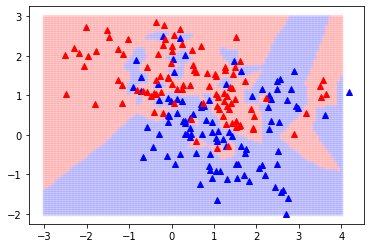

In [94]:
# Plot the decision regions
# Extract the rows whose prediction2 value is 0
test_data_blue = test_data_full[test_data_full["prediction2"] == 0]
test_data_blue.head()

# Use x1, x2 valus from test_data_blue to plot the points
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.',
         alpha=0.1) # alpha determines transparence

# Plot the class 1 points from test_data_full as red [poin]
test_data_red = test_data_full[test_data_full["prediction2"] ==1]
plt.plot(test_data_red["x1"],test_data_red["x2"], 'r.',
         alpha=0.1)

# Plot the training data
training_blue = data[data['y'] == 0]
training_red = data[data['y'] == 1]
plt.plot(training_blue['x1'], training_blue['x2'], 'b^')
plt.plot(training_red['x1'], training_red['x2'], 'r^')

### Error Rate

In [29]:
error_rate = []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

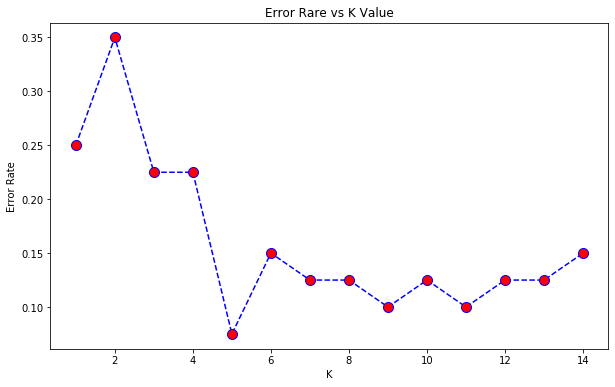

In [37]:
# Visualization of Error Rate vs K Value
plt.figure(figsize=(10,6))
plt.plot(range(1,15), error_rate, color = 'blue', linestyle='dashed', marker= 'o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rare vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# Create KNN Classifier
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
pred = knn.predict(X_test)

# COMPARISON to origina; K vlaue K=1
print('WITH K=1')
print('\n')
print("Confusion Matrix:\n" , confusion_matrix(y_test, pred))
print('\n')
print("Classification Report:\n" , classification_report(y_test, pred))

WITH K=1


Confusion Matrix:
 [[12  2]
 [ 8 18]]


Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71        14
           1       0.90      0.69      0.78        26

    accuracy                           0.75        40
   macro avg       0.75      0.77      0.74        40
weighted avg       0.80      0.75      0.76        40



## Re-generating kNN model for K=15

In [60]:
# Create KNN Classifier
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
pred = knn.predict(X_test)

# COMPARISON to origina; K vlaue K=15
print('WITH K=15')
print('\n')
print("Confusion Matrix:\n" , confusion_matrix(y_test, pred))
print('\n')
print("Classification Report:\n" , classification_report(y_test, pred))

WITH K=15


Confusion Matrix:
 [[18  2]
 [ 3 17]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



### Decision Region

In [101]:
test_data_full["prediction3"] = model_knn.predict(test_data_full[["x1","x2"]])
test_data_full

,x1,x2,prediction,prediction2,prediction3
0,-3.0,-2.000000,0,0,0
1,-3.0,-1.949495,0,0,0
2,-3.0,-1.898990,0,0,0
3,-3.0,-1.848485,0,0,0
4,-3.0,-1.797980,0,0,0
5,-3.0,-1.747475,0,0,0
6,-3.0,-1.696970,0,0,0
7,-3.0,-1.646465,0,0,0
8,-3.0,-1.595960,0,0,0
9,-3.0,-1.545455,0,0,0


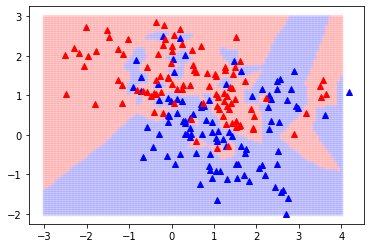

In [102]:
# Plot the decision regions
test_data_blue = test_data_full[test_data_full["prediction3"] == 0]
test_data_blue.head()
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.',
         alpha=0.1) 

test_data_red = test_data_full[test_data_full["prediction3"] == 1]
plt.plot(test_data_red["x1"],test_data_red["x2"], 'r.',
         alpha=0.1)

training_blue = data[data['y'] == 0]
training_red = data[data['y'] == 1]
plt.plot(training_blue['x1'], training_blue['x2'], 'b^')
plt.plot(training_red['x1'], training_red['x2'], 'r^')

### Error Rate

In [61]:
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

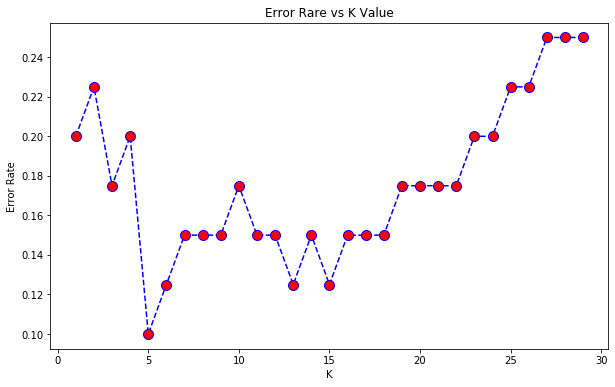

In [62]:
# Visualization of Error Rate vs K Value
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color = 'blue', linestyle='dashed', marker= 'o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rare vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Re-generating kNN model for K=50

In [63]:
# Create KNN Classifier
k = 50
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
pred = knn.predict(X_test)

# COMPARISON to origina; K vlaue K=50
print('WITH K=50')
print('\n')
print("Confusion Matrix:\n" , confusion_matrix(y_test, pred))
print('\n')
print("Classification Report:\n" , classification_report(y_test, pred))

WITH K=50


Confusion Matrix:
 [[14  6]
 [ 3 17]]


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.74      0.85      0.79        20

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40



### Decision Region

In [105]:
test_data_full["prediction4"] = model_knn.predict(test_data_full[["x1","x2"]])
test_data_full

,x1,x2,prediction,prediction2,prediction3,prediction4
0,-3.0,-2.000000,0,0,0,0
1,-3.0,-1.949495,0,0,0,0
2,-3.0,-1.898990,0,0,0,0
3,-3.0,-1.848485,0,0,0,0
4,-3.0,-1.797980,0,0,0,0
5,-3.0,-1.747475,0,0,0,0
6,-3.0,-1.696970,0,0,0,0
7,-3.0,-1.646465,0,0,0,0
8,-3.0,-1.595960,0,0,0,0
9,-3.0,-1.545455,0,0,0,0


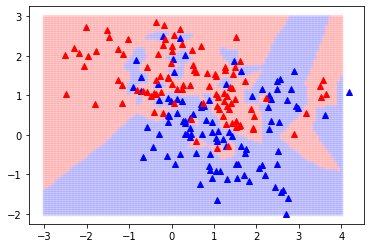

In [106]:
# Plot the decision regions
test_data_blue = test_data_full[test_data_full["prediction4"] == 0]
test_data_blue.head()
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.',
         alpha=0.1) 

test_data_red = test_data_full[test_data_full["prediction4"] ==1]
plt.plot(test_data_red["x1"],test_data_red["x2"], 'r.',
         alpha=0.1)

training_blue = data[data['y'] == 0]
training_red = data[data['y'] == 1]
plt.plot(training_blue['x1'], training_blue['x2'], 'b^')
plt.plot(training_red['x1'], training_red['x2'], 'r^')

### Error Rate

In [64]:
error_rate = []
for i in range(10, 70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

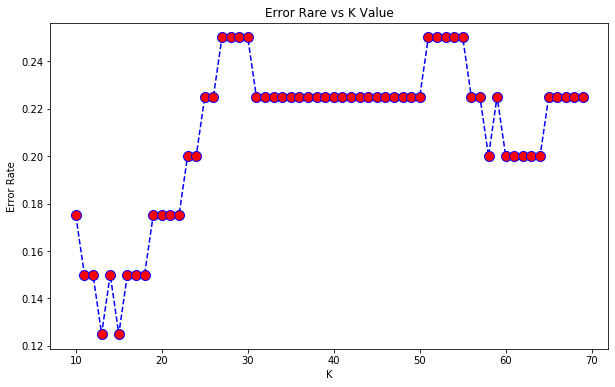

In [65]:
# Visualization of Error Rate vs K Value
plt.figure(figsize=(10,6))
plt.plot(range(10,70), error_rate, color = 'blue', linestyle='dashed', marker= 'o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rare vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')